CSE-221710304045-BHARGAV POKURI

# Flowers Recognition

Context<br>
This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

Content<br>
The pictures are divided into five classes: daisy, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

Acknowledgements<br>
The data collection is based on scraped data from flickr, google images, and yandex images.

Inspiration<br>
What kind of flower is that?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Importing Required Libraries

In [ ]:
import os
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
os.listdir("/content/drive/My Drive/flowers")

['dandelion', 'tulip', 'rose', 'sunflower', 'daisy']

In [ ]:
print(len(os.listdir("/content/drive/My Drive/flowers/daisy")))
print(len(os.listdir("/content/drive/My Drive/flowers/tulip")))
print(len(os.listdir("/content/drive/My Drive/flowers/sunflower")))
print(len(os.listdir("/content/drive/My Drive/flowers/rose")))
print(len(os.listdir("/content/drive/My Drive/flowers/dandelion")))

769
984
734
784
1055


In [ ]:
# categories in the data set
base_path = '/content/drive/My Drive/flowers'
categories = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
mapping = {}
count = 0
for i in categories:
    mapping[count] = i
    count+=1

# Image preprocessing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
img_height = 150
img_width = 150
C = 5
batch_size = 64
nb_epochs = 30
train_data_dir = '/content/drive/My Drive/flowers'

# all the images will be rescaled by 1./255

train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2) # set validation split


Using TensorFlow backend.


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,  # This is the source directory for training images
    target_size=(img_height, img_width),  # All images will be resized to 150x150
    batch_size=batch_size,
    shuffle = True,
    class_mode='categorical',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


Found 3462 images belonging to 5 classes.
Found 861 images belonging to 5 classes.


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


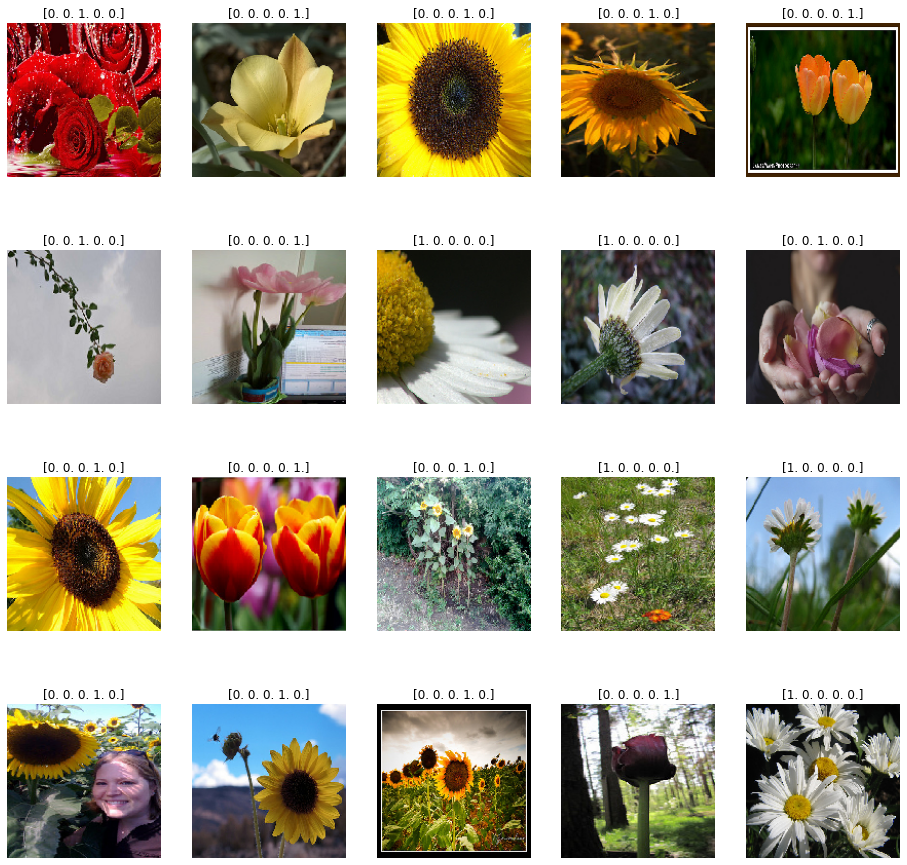

In [ ]:
imgs,labels=train_generator.next()
plt.figure(figsize=(16,16))
pos=1 ## plot position
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:])# to display image
  plt.title(labels[i])
  plt.axis('off')
  pos +=1

# Building the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 256)       2

# Compiling the model

In [ ]:
import tensorflow as tf
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs=20,validation_data=validation_generator,batch_size=64)

Epoch 1/20
55/55 [==============================] - 2085s 38s/step - loss: 1.7134 - accuracy: 0.2655 - val_loss: 2.2591 - val_accuracy: 0.1893
Epoch 2/20
55/55 [==============================] - 15s 270ms/step - loss: 1.4927 - accuracy: 0.3648 - val_loss: 1.4622 - val_accuracy: 0.3728
Epoch 3/20
55/55 [==============================] - 15s 273ms/step - loss: 1.3414 - accuracy: 0.4604 - val_loss: 1.1571 - val_accuracy: 0.5470
Epoch 4/20
55/55 [==============================] - 15s 268ms/step - loss: 1.1850 - accuracy: 0.5404 - val_loss: 1.1189 - val_accuracy: 0.5377
Epoch 5/20
55/55 [==============================] - 15s 267ms/step - loss: 1.0473 - accuracy: 0.5942 - val_loss: 1.0860 - val_accuracy: 0.5877
Epoch 6/20
55/55 [==============================] - 15s 269ms/step - loss: 0.9788 - accuracy: 0.6176 - val_loss: 0.9283 - val_accuracy: 0.6353
Epoch 7/20
55/55 [==============================] - 15s 270ms/step - loss: 0.9031 - accuracy: 0.6609 - val_loss: 1.2845 - val_accuracy: 0.5157

# Visulization of accuracy and loss of traing and validation images

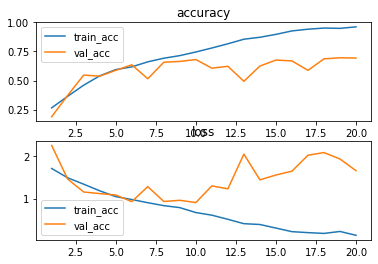

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


epochs=list(range(1,21))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()


plt.subplot(2,1,2)
plt.plot(epochs,train_loss,label='train_acc')
plt.plot(epochs,val_loss,label='val_acc')
plt.title('loss')
plt.legend()

# Prediction  against user sample

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(900, 600, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


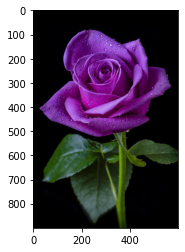

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/content/drive/My Drive/flowers/rose.jpg')
print(type(img))
plt.imshow(img)
#print(img.shape)

img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img = tf.image.resize(img,(150,150))

#scaling
img = img/255
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)

In [ ]:
model.predict(img).round(3)

array([[0.   , 0.   , 0.996, 0.   , 0.004]], dtype=float32)

In [ ]:
print(f"The Photo is in the category of {mapping[model.predict_classes(img)[0]]}")

The Photo is in the category of roses


<class 'PIL.JpegImagePlugin.JpegImageFile'>
(810, 720, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


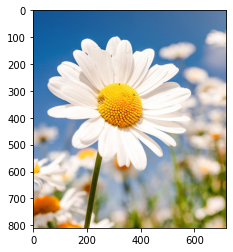

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/content/drive/My Drive/flowers/daisy.jpg')
print(type(img))
plt.imshow(img)
#print(img.shape)

img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img = tf.image.resize(img,(150,150))

#scaling
img = img/255
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)

In [ ]:
model.predict(img).round(2)

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
print(f"The Photo is in the category of {mapping[model.predict_classes(img)[0]]}")

The Photo is in the category of daisy
